In [1]:
import torch as T
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pickle
sns.set()

In [2]:
def plot_env_frames(env_name, y_metric='ep_r', y_label='Reward'):
    
    # plot with seaborn
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(env_name)
    ax.set_xlabel('Frames')  # todo: iters
    ax.set_ylabel(y_label)
    
    # find all env_name logs
    logs = []
    for path, _, files in os.walk('../'):
        for file in files:
            if file.endswith('.log') and env_name in file:
                alg = path.split('/')[1]
                logs.append((alg, os.path.join(path, file)))
    
    # plot each alg log
    for alg, fn_log in logs:
        try:
            log = pickle.load(open(fn_log, 'rb'))[y_metric]  # select metric
        except TypeError:
            log = T.load(fn_log)[y_metric]  # select metric
        df = pd.DataFrame(log, columns =['Frames', 'Iters', y_label])
        sma_y = df[y_label].rolling(300).mean()
        std_y = df[y_label].rolling(300).std()
        # plot avg & fill standard deviation
        ax.plot(df['Frames'], sma_y, label=alg)
        ax.fill_between(df['Frames'], sma_y-std_y, sma_y+std_y, alpha=0.25)
        
    # make x axis nice
    xlabels = [f'{int(x)}M' for x in ax.get_xticks()/1e6]
    ax.set_xticklabels(xlabels)
    
    # legend and render
    ax.legend()
    plt.savefig(env_name+'.'+y_label+'.frames.plt.png', dpi=300, pad_inches=0)
    
    plt.show()

In [3]:
def plot_env_iters(env_name, y_metric='ep_r', y_label='Reward'):
    
    # plot with seaborn
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(env_name)
    ax.set_xlabel('Weight Updates')  # todo: iters
    ax.set_ylabel(y_label)
    
    # find all env_name logs
    logs = []
    for path, _, files in os.walk('../'):
        for file in files:
            if file.endswith('.log') and env_name in file:
                alg = path.split('/')[1]
                logs.append((alg, os.path.join(path, file)))
    
    # plot each alg log
    for alg, fn_log in logs:
        try:
            log = pickle.load(open(fn_log, 'rb'))[y_metric]  # select metric
        except TypeError:
            log = T.load(fn_log)[y_metric]  # select metric
        df = pd.DataFrame(log, columns =['Frames', 'Iters', y_label])
        sma_y = df[y_label].rolling(300).mean()
        std_y = df[y_label].rolling(300).std()
        # plot avg & fill standard deviation
        ax.plot(df['Iters'], sma_y, label=alg)
        ax.fill_between(df['Iters'], sma_y-std_y, sma_y+std_y, alpha=0.25)
        
    # make x axis nice
    xlabels = [f'{int(x)}K' for x in ax.get_xticks()/1e3]
    ax.set_xticklabels(xlabels)
    
    # legend and render
    ax.legend()
    
    plt.savefig(env_name+'.'+y_label+'.iters.plt.png', dpi=300, pad_inches=0)

    plt.show()

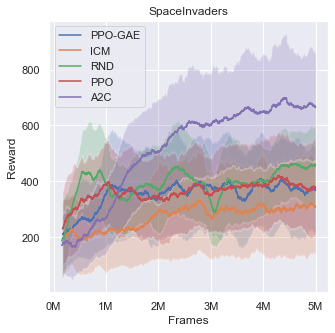

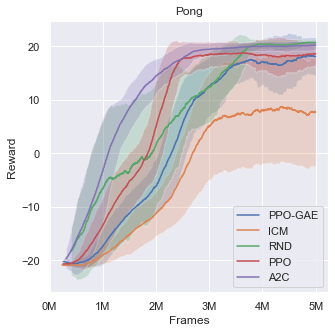

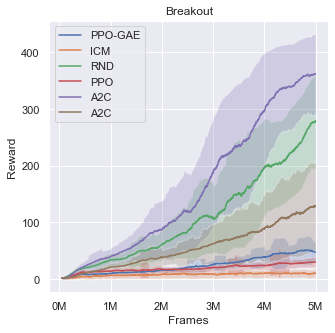

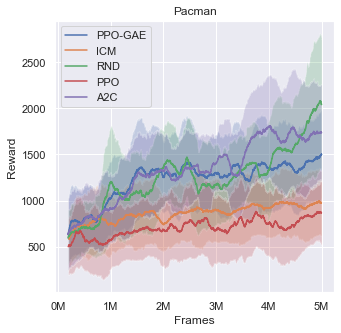

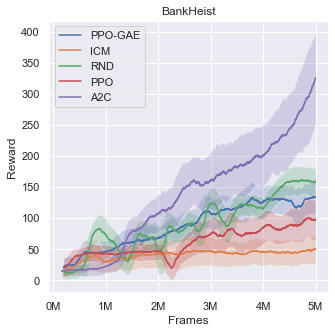

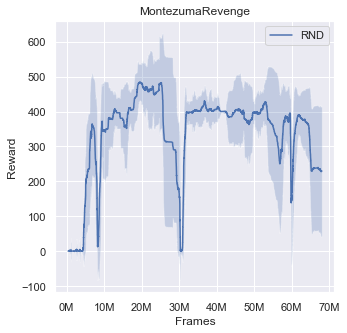

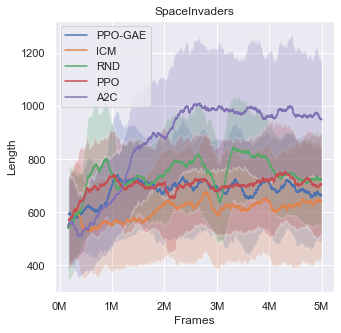

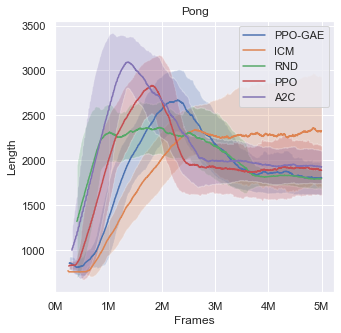

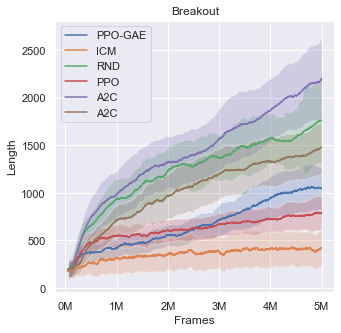

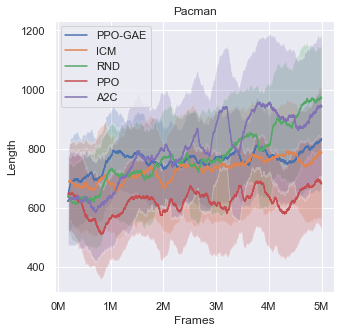

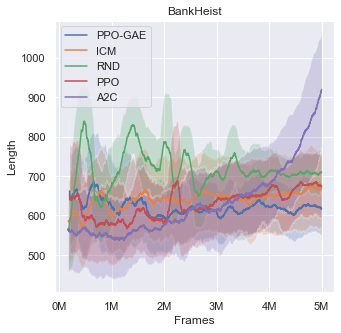

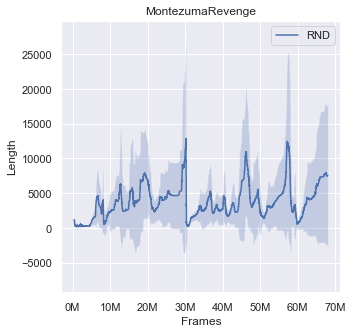

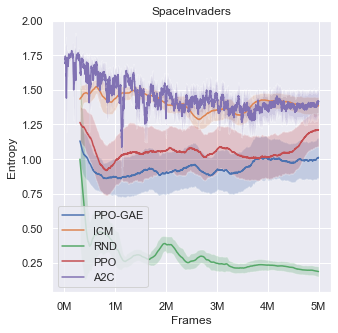

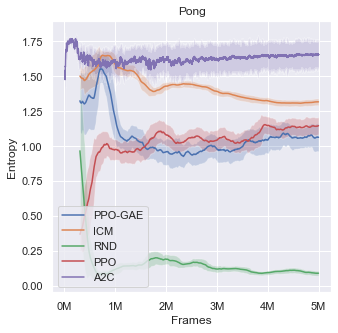

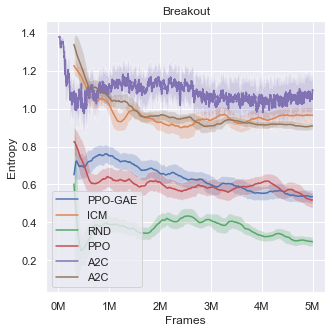

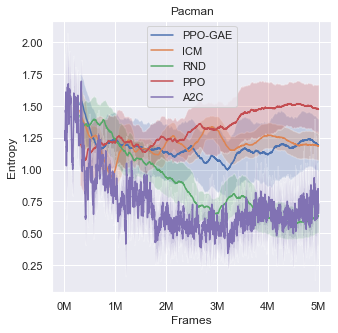

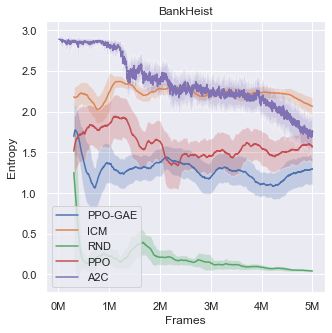

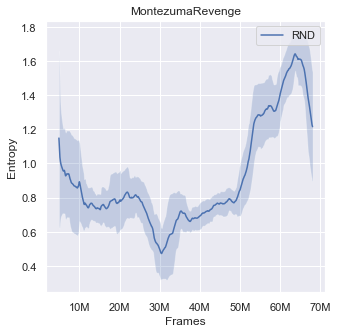

[None, None, None, None, None, None]

In [4]:
[plot_env_frames(x, 'ep_r', 'Reward') for x in ['SpaceInvaders', 'Pong', 'Breakout', 'Pacman', 'BankHeist', 'MontezumaRevenge']]
[plot_env_frames(x, 'ep_l', 'Length') for x in ['SpaceInvaders', 'Pong', 'Breakout', 'Pacman', 'BankHeist', 'MontezumaRevenge']]
[plot_env_frames(x, 'ent', 'Entropy') for x in ['SpaceInvaders', 'Pong', 'Breakout', 'Pacman', 'BankHeist', 'MontezumaRevenge']]